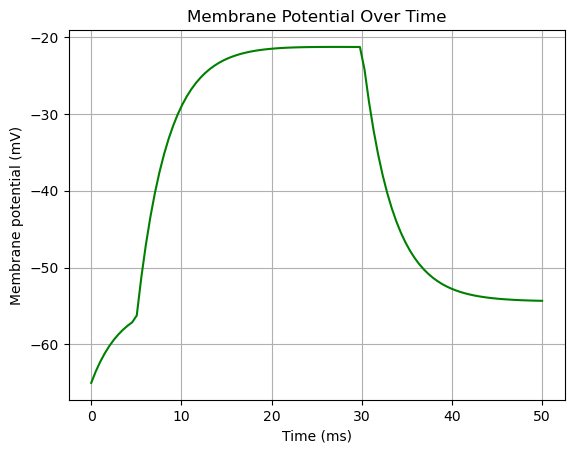

In [27]:
from scipy.optimize import bisect
import numpy as np
import scipy as sc
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.constants as cnst
%matplotlib inline

'''
Dakota Hansen
Anton Kourakin

Outline:

Step 1: Define the four differnetial equations of the Hodgkin-Huxley Model:
- This includes:
1) dV/dt = (Iext - Ina - Ik - Il)/Cm, which is the rate of change of the membrane potential
Iext is the externa current through the neuron, which can vary, so we need to obtain data to solve this.
Ina is the current passing through the sodium-voltage gate
Ik is the current passing through the potassium-voltage gate
Il is the leak current.
Cm is the membrane capacitance.
2) dndt = an*(1-n) - bn*n, which is the the Potassium activation gating variable
'an' is the alpha value for the potassium activation
'bn' is the beta value for the potasium activation
n is the varible that describes the potassium activtion
3) dmdt = am*(1-m) - bm*m, which is the the Sodium activation gating variable
'am' is the alpha value for the sodium activation
'bm' is the beta value for the sodium activation
m is the varible that describes the sodium activtion
4) dhdt = ah*(1-h) - bh*h, which is the the Sodium inactivation gating variable
'ah' is the alpha value for the sodium inactivation
'bh' is the beta value for the sodium inactivation
h is the varible that describes the sodium inactivtion
Step 2: Numerically solve for these equations using odeint from scipy:
- This includes:
1) Integrating the equations with odeint, with respect to time.
2) Setting initial values for V (the resting potential V = -65 eV), the gating variables n, m and h.
3) Setting a time step and a time duration (0 to 50 milliseconds)
Step 3: Simulate the Action potentials:
1) This means we can apply a stimulus like injection or pain to initiate the action potential
2) vary the magnitudes of the parameters and see how that affects initiation and propagation and the amplitude of our waves.
Step 4: Plot our graphs:
1) Plotting the change in membrane potential with respect to time.
2) Plotting each of the gated variables with respect to time.
3) Identify the minimum stimuli require to initiate an action potential.

'''

def Iext(t):
    return 10 if 5 <= t <= 30 else 0

def alpha_rtconsts(V): #Defines the alpha values for n, m, and h
    num_n = 10 - V
    num_m = 25 - V

    ah = 0.07*np.exp(-V/20)
    am = 0.1*(num_m)/(np.exp(num_m/10)-1)
    an = 0.01*(num_n)/(np.exp(num_n/10)-1)

    return ah, am, an

def beta_rtconsts(V): #Defines the beta values for n, m, and h,
    num = 30-V

    bh = 1/(np.exp(num/10)+1)
    bm = 4*np.exp(-V/18)
    bn = 0.125*np.exp(-V/80)

    return bh, bm, bn

def hod_hux(X, t): #This defines all the Hodgkin-huxley equations
    V, n, m, h = X   

#The following values are determined from previous experimental data.
    gNa = 120 #mS/cm^2 (maximal Sodium conductance)
    gK = 36 #mS/cm^2 (maximal Potassium conductance)
    gL = 0.3 #mS/cm^2 (Leak conductance)
    ENa = 50 #mV (sodium equilibrium potential)
    EK = -77 #mV (potassium equilibrium potential)
    EL = -54.4 #mV (leak equilibrium potential)
    Cm = 1 #mu*F/cm^2 (Membrane capacitance)

    ah, am, an = alpha_rtconsts(V)
    bh, bm, bn = beta_rtconsts(V)

    Ina = gNa*(m**3)*h*(V - ENa)
    Ik = gK*(n**4)*(V - EK)
    Il = gL*(V - EL)

    dVdt = (Iext(t) - Ina - Ik - Il)/Cm #Defines the function for membrane potential w/ respect to time (dV_m/dt).

    dndt = an*(1-n) - bn*n #Defines the Potassium activation gating variable (dn/dt)
    dmdt = am*(1-m) - bm*m #Defines the Sodium activation gating variable (dm/dt)
    dhdt = ah*(1-h) - bh*h #Defines the Sodium inactivation gating variable (dh/dt)

    return dVdt, dndt, dmdt, dhdt

def m_vals(am, bm): #defines the value of m (sodium activation)
    return am/(am + bm)

def n_vals(an, bn): #defines the value of n (for potassium)
    return an/(an + bn)

def h_vals(ah, bh): #defines the value of h (Sodium inactivation)
    return ah/(ah + bh)

#Initial value input
V0 = -65

ah0, am0, an0 = alpha_rtconsts(V0)
bh0, bm0, bn0 = beta_rtconsts(V0)

n0 = n_vals(an0, bn0)
m0 = m_vals(am0, bm0)
h0 = h_vals(ah0, bh0)

X0 = [-65, n0, m0, h0]

V = np.linspace(-65.0, 60.0, 1000) #varying potential
t = np.linspace(0.0, 50.0, 100) #microseconds

#We are solving the ODE system of the 4 differential equations
ode_i = odeint(hod_hux, X0, t)

plt.plot(t, ode_i[:, 0], 'g-') # V over time
plt.grid(100)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane Potential Over Time')
plt.show()

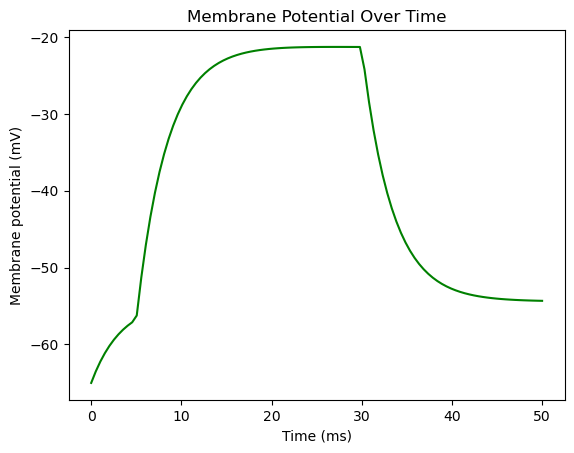

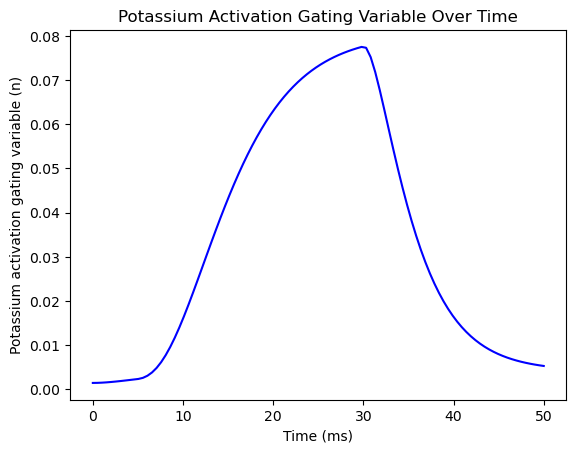

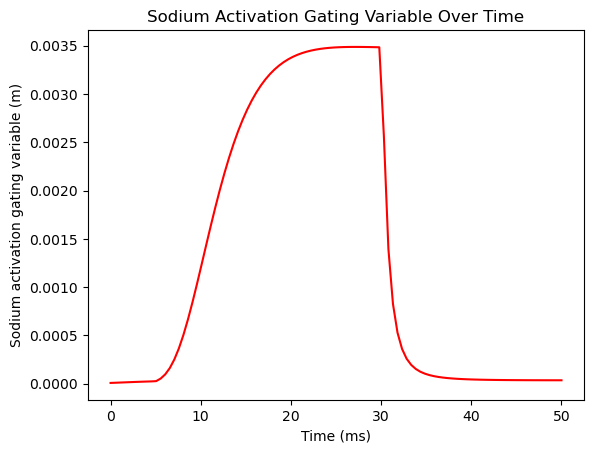

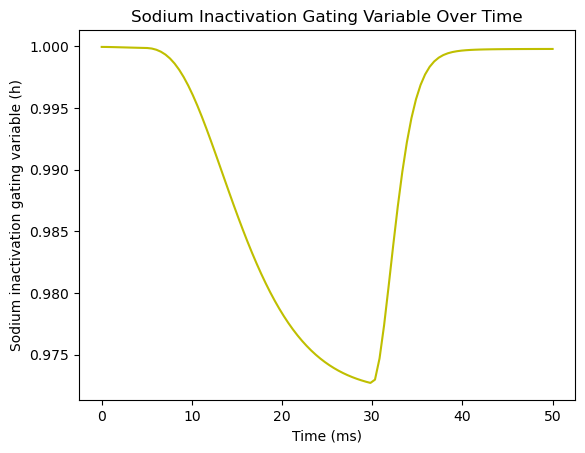

In [28]:
# Plotting membrane potential (V) over time
plt.plot(t, ode_i[:, 0], 'g-')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane Potential Over Time')
plt.show()

# Plotting potassium activation gating variable (n) over time
plt.plot(t, ode_i[:, 1], 'b-')
plt.xlabel('Time (ms)')
plt.ylabel('Potassium activation gating variable (n)')
plt.title('Potassium Activation Gating Variable Over Time')
plt.show()

# Plotting sodium activation gating variable (m) over time
plt.plot(t, ode_i[:, 2], 'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium activation gating variable (m)')
plt.title('Sodium Activation Gating Variable Over Time')
plt.show()

# Plotting sodium inactivation gating variable (h) over time
plt.plot(t, ode_i[:, 3], 'y-')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium inactivation gating variable (h)')
plt.title('Sodium Inactivation Gating Variable Over Time')
plt.show()


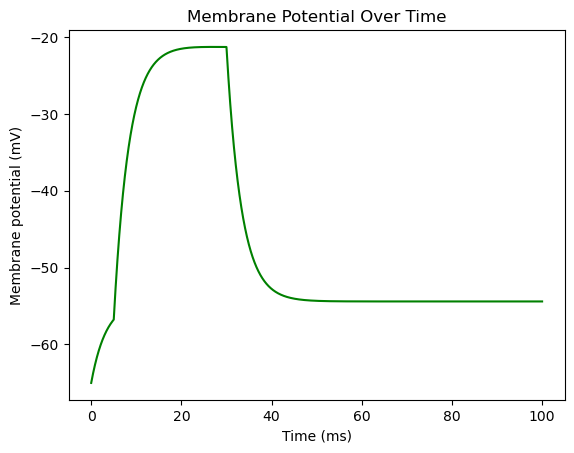

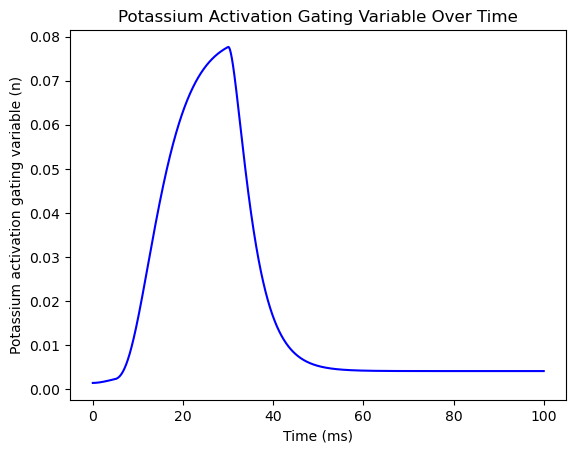

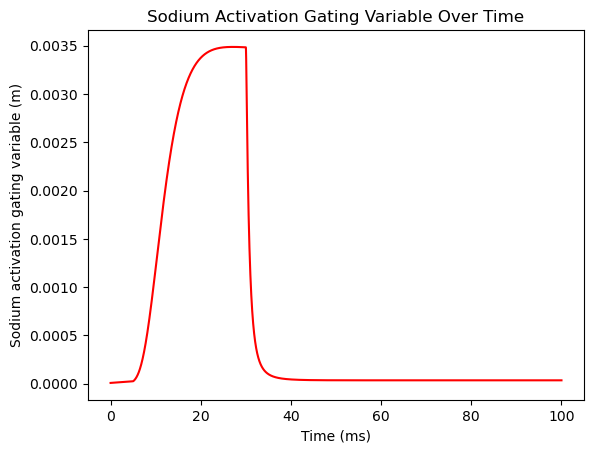

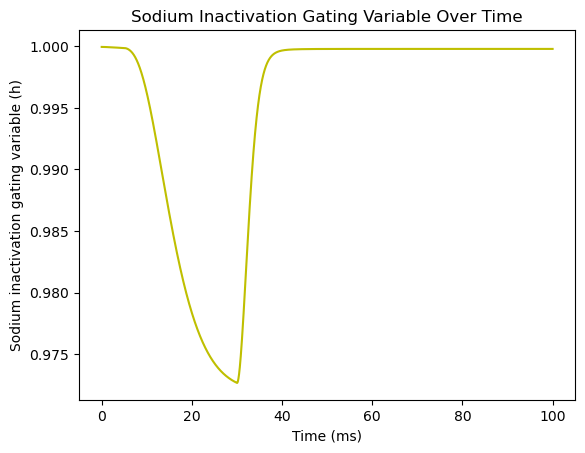

In [19]:
# Modify the linspace for potential and time
V = np.linspace(-65, 100, 10000)  # Modify the range for potential
t = np.linspace(0.0, 100.0, 10000)  # Modify the range for time

# We are solving the ODE system of the 4 differential equations
ode_i = odeint(hod_hux, X0, t)

# Plotting membrane potential (V) over time
plt.plot(t, ode_i[:, 0], 'g-')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane Potential Over Time')
plt.show()

# Plotting potassium activation gating variable (n) over time
plt.plot(t, ode_i[:, 1], 'b-')
plt.xlabel('Time (ms)')
plt.ylabel('Potassium activation gating variable (n)')
plt.title('Potassium Activation Gating Variable Over Time')
plt.show()

# Plotting sodium activation gating variable (m) over time
plt.plot(t, ode_i[:, 2], 'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium activation gating variable (m)')
plt.title('Sodium Activation Gating Variable Over Time')
plt.show()

# Plotting sodium inactivation gating variable (h) over time
plt.plot(t, ode_i[:, 3], 'y-')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium inactivation gating variable (h)')
plt.title('Sodium Inactivation Gating Variable Over Time')
plt.show()


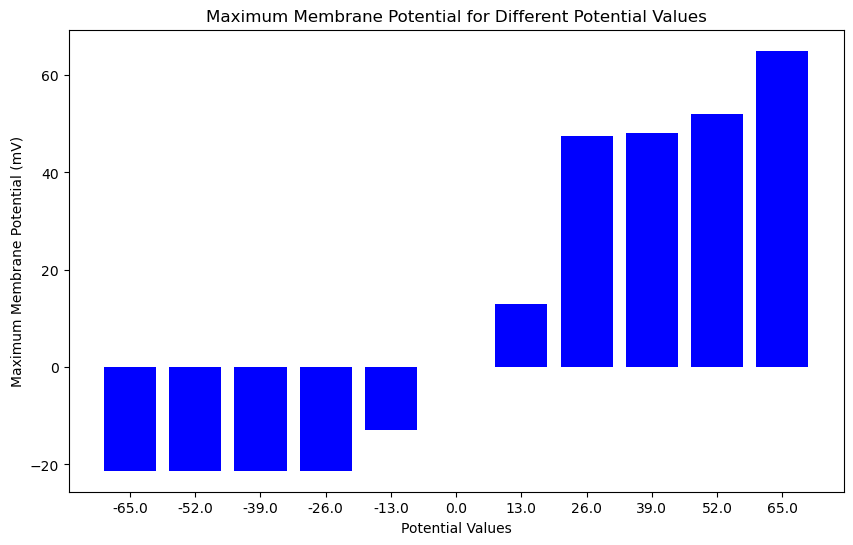

In [43]:
# Define potential and time values for which you want to calculate the maximum membrane potential
potential_values = np.linspace(-65.0, 65.0, 11)  # Example potential values
time_values = np.linspace(0.0, 50.0, 11)  # Example time values

max_membrane_potentials = []

# Calculate maximum membrane potential for each combination of potential and time
for potential in potential_values:
    for time in time_values:
        # Solve ODEs for the given potential and time
        X0 = [potential, n0, m0, h0]
        ode_i = odeint(hod_hux, X0, t)
        
        # Find the maximum membrane potential
        max_membrane_potential = np.max(ode_i[:, 0])
        max_membrane_potentials.append(max_membrane_potential)

# Reshape max_membrane_potentials array to match potential_values and time_values
max_membrane_potentials = np.array(max_membrane_potentials).reshape(len(potential_values), len(time_values))

# Create a bar graph to visualize the maximum membrane potentials
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(potential_values)), np.max(max_membrane_potentials, axis=1), color='b')
plt.xlabel('Potential Values')
plt.ylabel('Maximum Membrane Potential (mV)')
plt.title('Maximum Membrane Potential for Different Potential Values')
plt.xticks(np.arange(len(potential_values)), potential_values)
plt.show()
